How to improve education?

http://www3.dsi.uminho.pt/pcortez/student.pdf<br>
https://archive.ics.uci.edu/ml/datasets/Student+Performance<br>
https://archive.ics.uci.edu/ml/machine-learning-databases/00320/

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_por = pd.read_pickle('df_por.pkl')

df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [3]:
df_por.shape

(649, 33)

## G3

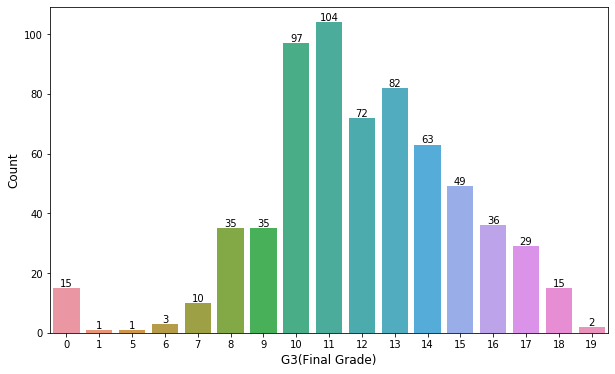

In [4]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_por['G3'])
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

In [5]:
df_por['G3'].value_counts().sort_index(ascending = False)

19      2
18     15
17     29
16     36
15     49
14     63
13     82
12     72
11    104
10     97
9      35
8      35
7      10
6       3
5       1
1       1
0      15
Name: G3, dtype: int64

In [6]:
print('The Median of G3(Final Grade) is: {}'.format(round(df_por['G3'].median(),2)))
print('The Mean of G3(Final Grade) is: {}'.format(round(df_por['G3'].mean(),2)))

The Median of G3(Final Grade) is: 12.0
The Mean of G3(Final Grade) is: 11.91


In [7]:
df_por['G3'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

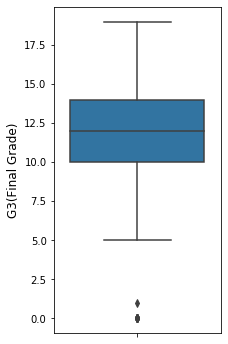

In [8]:
plt.figure(figsize = (3,6))
sns.boxplot(df_por['G3'],orient = 'v')
plt.ylabel('G3(Final Grade)',fontsize = 12);

In [9]:
df_por.loc[df_por['G3'] <= 2,'G3'] = 1
df_por.loc[(df_por['G3'] > 2) & (df_por['G3'] <= 4),'G3'] = 2
df_por.loc[(df_por['G3'] > 4) & (df_por['G3'] <= 6),'G3'] = 3
df_por.loc[(df_por['G3'] > 6) & (df_por['G3'] <= 8),'G3'] = 4
df_por.loc[(df_por['G3'] > 8) & (df_por['G3'] <= 10),'G3'] = 5
df_por.loc[(df_por['G3'] > 10) & (df_por['G3'] <= 12),'G3'] = 6
df_por.loc[(df_por['G3'] > 12) & (df_por['G3'] <= 14),'G3'] = 7
df_por.loc[(df_por['G3'] > 14) & (df_por['G3'] <= 16),'G3'] = 8
df_por.loc[(df_por['G3'] > 16) & (df_por['G3'] <= 18),'G3'] = 9
df_por.loc[(df_por['G3'] > 18) & (df_por['G3'] <= 20),'G3'] = 10

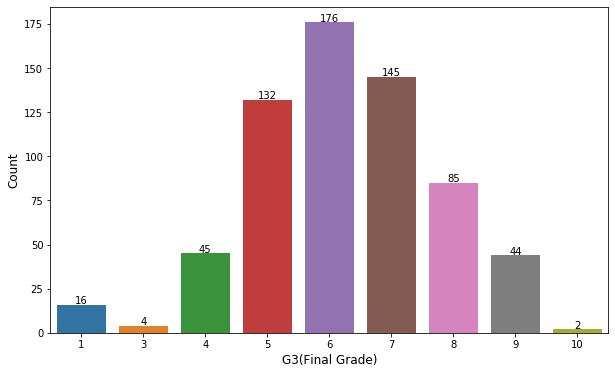

In [10]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_por['G3'])
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

In [11]:
df_por_histograms = df_por.drop('G3',axis = 1)

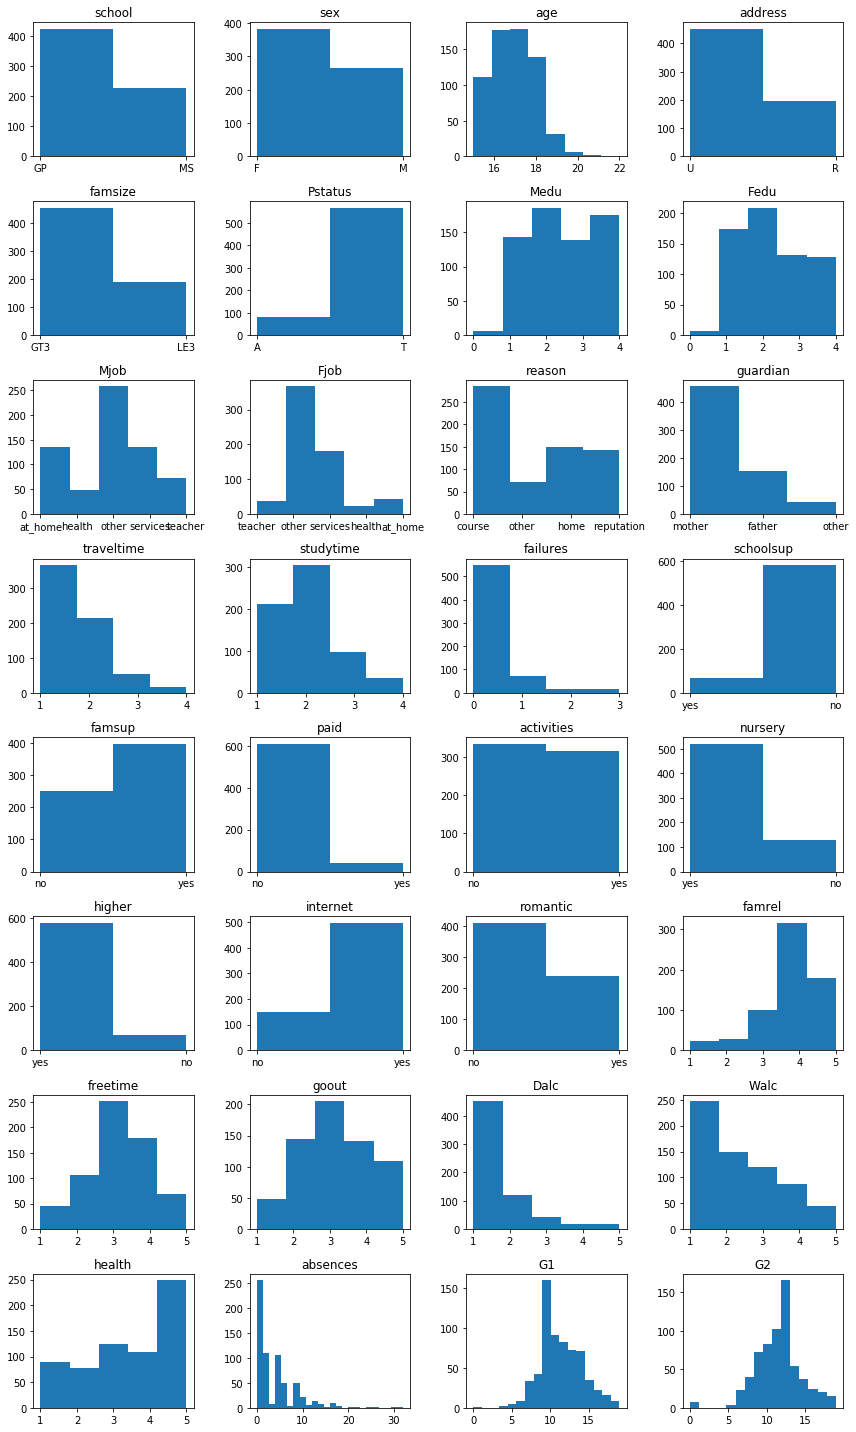

In [12]:
fig = plt.figure(figsize = (12,20))
for i in range(1,df_por_histograms.shape[1] + 1):
    plt.subplot(8,4,i)
    ax = plt.gca()
    ax.set_title(df_por_histograms.columns[i - 1],fontsize = 12)
    ax.tick_params(axis = 'x')
    n_unique_values = len(df_por_histograms.iloc[:,i - 1].unique())
    plt.hist(df_por_histograms.iloc[:,i - 1],bins = n_unique_values)
fig.tight_layout();

In [13]:
df_por['school'] = df_por['school'].apply(lambda x: 1 if x == 'GP' else 0)
df_por['sex'] = df_por['sex'].apply(lambda x: 1 if x == 'F' else 0)
df_por['address'] = df_por['address'].apply(lambda x: 1 if x == 'U' else 0)
df_por['famsize'] = df_por['famsize'].apply(lambda x: 1 if x == 'GT3' else 0)
df_por['Pstatus'] = df_por['Pstatus'].apply(lambda x: 1 if x == 'T' else 0)

In [14]:
binary_variables = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

for v in binary_variables:
    df_por[v] = df_por[v].apply(lambda x: 1 if x == 'yes' else 0)

In [15]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,6
1,1,1,17,1,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,6
2,1,1,15,1,0,1,1,1,at_home,other,other,mother,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,6
3,1,1,15,1,1,1,4,2,health,services,home,mother,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,7
4,1,1,16,1,1,1,3,3,other,other,home,father,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,7


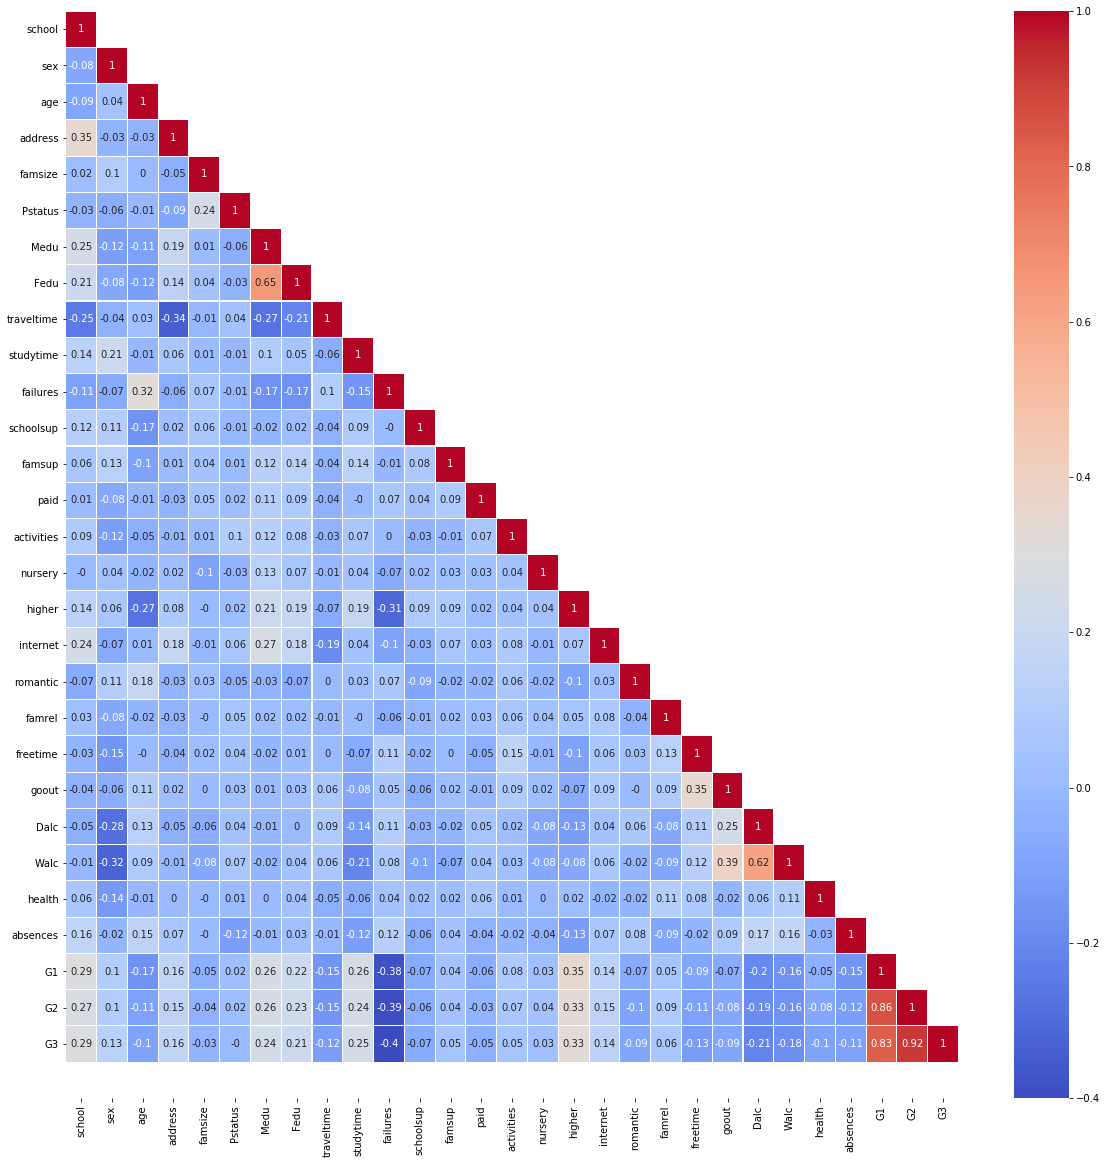

In [16]:
df_corr = df_por.corr().round(2)

mask = np.ones(df_corr.shape,dtype = bool)
mask[np.tril_indices_from(mask)] = False

f,ax = plt.subplots(figsize = (20,20))
ax = sns.heatmap(df_corr,mask = mask,annot = True,cmap = 'coolwarm',linewidth = 0.1,linecolor = 'white')
ax.set_ylim([30,0]);

In [17]:
def print_correlation_table(variable):
    correlation_abs = round(df_corr.corr()[variable].abs(),2)
    correlation_type = df_corr.corr()[variable].apply(lambda x: 'Pos' if x >= 0 else 'Neg')
    correlation = pd.concat([correlation_abs,correlation_type],axis = 1,keys = ['correlation','type'])
    correlation = correlation.sort_values('correlation',ascending = False)
    return correlation

In [18]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,6
1,1,1,17,1,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,6
2,1,1,15,1,0,1,1,1,at_home,other,other,mother,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,6
3,1,1,15,1,1,1,4,2,health,services,home,mother,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,7
4,1,1,16,1,1,1,3,3,other,other,home,father,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,7


In [19]:
print_correlation_table('G3')

,correlation,type
G3,1.00,Pos
G2,1.00,Pos
G1,0.99,Pos
failures,0.79,Neg
higher,0.68,Pos
Dalc,0.56,Neg
studytime,0.55,Pos
school,0.54,Pos
Medu,0.49,Pos
Walc,0.49,Neg


In [20]:
df_por = df_por.drop(['G2','G1'],axis =1)

In [21]:
def one_hot(df,cols):
    for each in cols:
        dummies = pd.get_dummies(df[each],prefix = each,drop_first = False)
        df = pd.concat([df,dummies], axis=1)
    return df

In [22]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,1,1,18,1,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,6
1,1,1,17,1,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,6
2,1,1,15,1,0,1,1,1,at_home,other,other,mother,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,6
3,1,1,15,1,1,1,4,2,health,services,home,mother,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,7
4,1,1,16,1,1,1,3,3,other,other,home,father,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,7


In [23]:
df_por = one_hot(df_por,['Mjob','Fjob','reason','guardian'])

In [24]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,6,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,at_home,other,other,mother,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,6,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,health,services,home,mother,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,7,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,other,other,home,father,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,7,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [25]:
df_por = df_por.drop(columns = ['Mjob','Fjob','reason','guardian'])

df_por = df_por.drop(columns = ['Mjob_health','Fjob_health','guardian_other','reason_other'])

In [26]:
# Repasar

# print_correlation_table('G3')

In [27]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,6,1,0,0,0,0,0,0,1,1,0,0,0,1
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,6,1,0,0,0,0,1,0,0,1,0,0,1,0
2,1,1,15,1,0,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,6,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,15,1,1,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,7,0,0,0,0,0,0,1,0,0,1,0,0,1
4,1,1,16,1,1,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,7,0,1,0,0,0,1,0,0,0,1,0,1,0


In [28]:
X = np.array(df_por.drop('G3',axis = 1))
y = np.array(df_por['G3'])

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [30]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred = model.predict(X_test)

In [32]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,6.964534,10
1,6.838507,6
2,7.458413,9
3,6.430248,6
4,5.384386,6


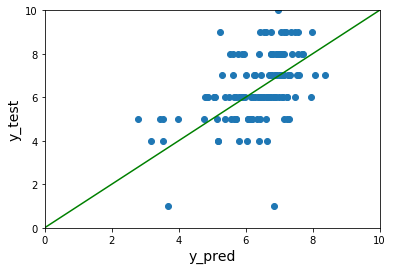

In [33]:
plt.scatter(df_temp['y_pred'],df_temp['y_test'])
plt.xlabel('y_pred',fontsize = 14)
plt.ylabel('y_test',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g');

In [34]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [35]:
rmse(y_pred,y_test)

1.3831936979826487

Acciones a realizar:
* Quitar variables muy correlacionadas entre sí mismas y con 'G3'
* Modelado:
** Probar otros modelos: Regresión Lineal, Random Forest
* Normalizar variables
* Normalizar la variable 'G3' prestando especial atención al número de ceros que hay

In [36]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,6,1,0,0,0,0,0,0,1,1,0,0,0,1
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,6,1,0,0,0,0,1,0,0,1,0,0,1,0
2,1,1,15,1,0,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,6,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,15,1,1,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,7,0,0,0,0,0,0,1,0,0,1,0,0,1
4,1,1,16,1,1,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,7,0,1,0,0,0,1,0,0,0,1,0,1,0


In [37]:
pd.to_pickle(df_por,'df_por_modelling-range_g3-10.pkl')